In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os Dados

In [31]:
ocorrencia=pd.read_csv('Dados/ocorrencia_2010_2020.csv', sep = ';', low_memory=False)
ocorrencia

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,...,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,...,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,...,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,...,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,...,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,79804,79804,79804,79804,79804,INCIDENTE,-23.0069444444,-47.1344444444,CAMPINAS,SP,...,29/12/2020,19:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5748,79757,79757,79757,79757,79757,INCIDENTE GRAVE,-10.804722,-49.756389,LAGOA DA CONFUSÃO,TO,...,30/12/2020,18:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5749,79802,79802,79802,79802,79802,INCIDENTE,-22.81,-43.25055555555,RIO DE JANEIRO,RJ,...,30/12/2020,00:54:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5750,79756,79756,79756,79756,79756,INCIDENTE GRAVE,-22.507222,-54.364167,VICENTINA,MS,...,31/12/2020,09:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


### Checando se todos os códigos de ocorrência são iguais

In [32]:
for i in range(1,5):
    print(ocorrencia['codigo_ocorrencia'].equals(ocorrencia['codigo_ocorrencia' + str(i)]))


True
True
True
True


In [33]:
print(ocorrencia.columns.values)

['codigo_ocorrencia' 'codigo_ocorrencia1' 'codigo_ocorrencia2'
 'codigo_ocorrencia3' 'codigo_ocorrencia4' 'ocorrencia_classificacao'
 'ocorrencia_latitude' 'ocorrencia_longitude' 'ocorrencia_cidade'
 'ocorrencia_uf' 'ocorrencia_pais' 'ocorrencia_aerodromo' 'ocorrencia_dia'
 'ocorrencia_hora' 'investigacao_aeronave_liberada' 'investigacao_status'
 'divulgacao_relatorio_numero' 'divulgacao_relatorio_publicado'
 'divulgacao_dia_publicacao' 'total_recomendacoes'
 'total_aeronaves_envolvidas' 'ocorrencia_saida_pista']


### Checando os tipo de cada coluna e se tem valores faltantes

In [34]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               5752 non-null   int64 
 1   codigo_ocorrencia1              5752 non-null   int64 
 2   codigo_ocorrencia2              5752 non-null   int64 
 3   codigo_ocorrencia3              5752 non-null   int64 
 4   codigo_ocorrencia4              5752 non-null   int64 
 5   ocorrencia_classificacao        5752 non-null   object
 6   ocorrencia_latitude             4187 non-null   object
 7   ocorrencia_longitude            4187 non-null   object
 8   ocorrencia_cidade               5752 non-null   object
 9   ocorrencia_uf                   5752 non-null   object
 10  ocorrencia_pais                 5752 non-null   object
 11  ocorrencia_aerodromo            5752 non-null   object
 12  ocorrencia_dia                  5752 non-null   

### Checando quantos valores faltantes tem em cada coluna

In [35]:
print("Missing values: ", ocorrencia.isnull().sum())

Missing values:  codigo_ocorrencia                    0
codigo_ocorrencia1                   0
codigo_ocorrencia2                   0
codigo_ocorrencia3                   0
codigo_ocorrencia4                   0
ocorrencia_classificacao             0
ocorrencia_latitude               1565
ocorrencia_longitude              1565
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      1
investigacao_aeronave_liberada     341
investigacao_status                340
divulgacao_relatorio_numero        865
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4258
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64


### Removendo as colunas com dados faltante, visto que não são  colunas essenciais para as análises que serão realizadas

In [36]:
ocorrencia_filtrada = ocorrencia.drop(['ocorrencia_latitude', 'ocorrencia_longitude', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_dia_publicacao'], axis = 1)
ocorrencia_filtrada

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,****,03/01/2010,12:00:00,NÃO,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,NÃO,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,NÃO,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,BRASIL,****,04/01/2010,17:30:00,SIM,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,NÃO,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5747,79804,79804,79804,79804,79804,INCIDENTE,CAMPINAS,SP,BRASIL,SBKP,29/12/2020,19:00:00,NÃO,0,1,NÃO
5748,79757,79757,79757,79757,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,BRASIL,****,30/12/2020,18:30:00,NÃO,0,1,NÃO
5749,79802,79802,79802,79802,79802,INCIDENTE,RIO DE JANEIRO,RJ,BRASIL,SBGL,30/12/2020,00:54:00,NÃO,0,1,NÃO
5750,79756,79756,79756,79756,79756,INCIDENTE GRAVE,VICENTINA,MS,BRASIL,****,31/12/2020,09:00:00,NÃO,0,1,NÃO


In [37]:
print("Missing values: ", ocorrencia_filtrada.isnull().sum())

Missing values:  codigo_ocorrencia                 0
codigo_ocorrencia1                0
codigo_ocorrencia2                0
codigo_ocorrencia3                0
codigo_ocorrencia4                0
ocorrencia_classificacao          0
ocorrencia_cidade                 0
ocorrencia_uf                     0
ocorrencia_pais                   0
ocorrencia_aerodromo              0
ocorrencia_dia                    0
ocorrencia_hora                   1
divulgacao_relatorio_publicado    0
total_recomendacoes               0
total_aeronaves_envolvidas        0
ocorrencia_saida_pista            0
dtype: int64


### Checando se existem dados duplicados

In [38]:
print("Duplicated values: ", ocorrencia_filtrada.duplicated().sum())

Duplicated values:  0


In [39]:
for column in ocorrencia_filtrada.columns:
    print("\n" + column)
    print(ocorrencia_filtrada[column].value_counts())


codigo_ocorrencia
49152    1
79512    1
44399    1
50542    1
77250    1
        ..
43684    1
45731    1
43680    1
45727    1
43007    1
Name: codigo_ocorrencia, Length: 5752, dtype: int64

codigo_ocorrencia1
49152    1
79512    1
44399    1
50542    1
77250    1
        ..
43684    1
45731    1
43680    1
45727    1
43007    1
Name: codigo_ocorrencia1, Length: 5752, dtype: int64

codigo_ocorrencia2
49152    1
79512    1
44399    1
50542    1
77250    1
        ..
43684    1
45731    1
43680    1
45727    1
43007    1
Name: codigo_ocorrencia2, Length: 5752, dtype: int64

codigo_ocorrencia3
49152    1
79512    1
44399    1
50542    1
77250    1
        ..
43684    1
45731    1
43680    1
45727    1
43007    1
Name: codigo_ocorrencia3, Length: 5752, dtype: int64

codigo_ocorrencia4
49152    1
79512    1
44399    1
50542    1
77250    1
        ..
43684    1
45731    1
43680    1
45727    1
43007    1
Name: codigo_ocorrencia4, Length: 5752, dtype: int64

ocorrencia_classificacao
INCIDE

# Selecionando as colunas que serão utilizadas nas análises

In [40]:
df = ocorrencia_filtrada.loc[:,['codigo_ocorrencia1', 'ocorrencia_classificacao', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_aerodromo', 'ocorrencia_dia']]
df

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010
...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020


### Splitando a coluna da data (ocorrencia_dia) em dia, mês e ano

In [41]:
df[['Dia','Mes', 'Ano']] = df.ocorrencia_dia.str.split("/",expand=True,)

In [42]:
df.to_csv('Dados/Ocorrencias_Filtradas.csv', index=False)

In [43]:
df

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,03,01,2010
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,03,01,2010
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,03,01,2010
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,04,01,2010
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,05,01,2010
...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020


### Separando as classificações de incidentes

In [44]:
incidentes = df.loc[df['ocorrencia_classificacao'] == 'INCIDENTE']
incidentes_graves = df.loc[df['ocorrencia_classificacao'] == 'INCIDENTE GRAVE']
acidentes = df.loc[df['ocorrencia_classificacao'] == 'ACIDENTE']

# Panorama dos acidentes e incidentes nos últimos 10 anos

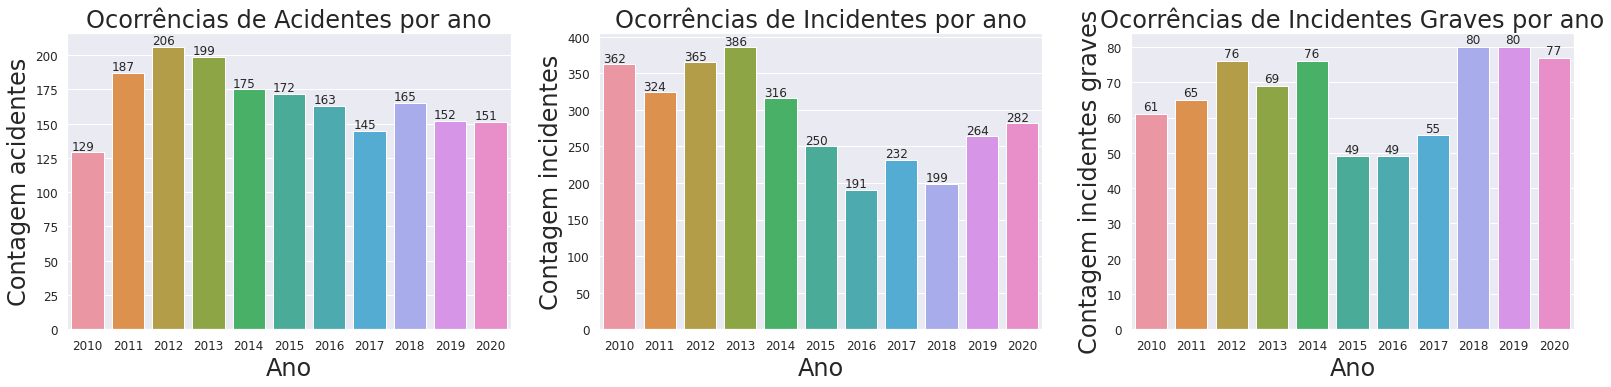

In [45]:
fig = plt.figure(figsize=(27,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

plot1 = plt.subplot(2, 3, 1)

ax = sns.countplot(x=acidentes.Ano ,data=acidentes)
plt.xlabel("Ano")
plt.ylabel("Contagem acidentes")
plt.title("Ocorrências de Acidentes por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+2))
        
plot2 = plt.subplot(2, 3, 2)
ax = sns.countplot(x=incidentes.Ano ,data=incidentes)
plt.xlabel("Ano")
plt.ylabel("Contagem incidentes")
plt.title("Ocorrências de Incidentes por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+3))

plot3 = plt.subplot(2, 3, 3)
ax = sns.countplot(x=incidentes_graves.Ano ,data=incidentes_graves)
plt.xlabel("Ano")
plt.ylabel("Contagem incidentes graves")
plt.title("Ocorrências de Incidentes Graves por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+1))

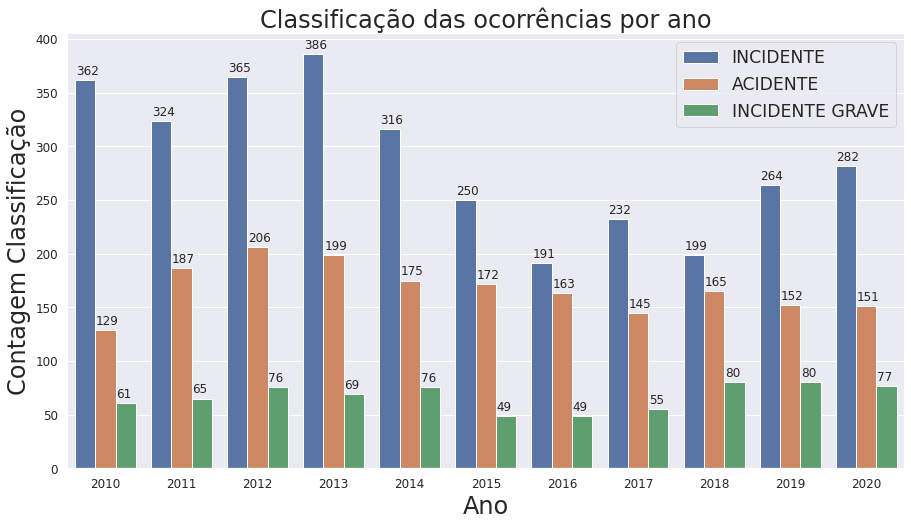

In [46]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df.Ano ,data=df, hue=df.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Ano")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por ano")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))


# Panorama dos acidentes e incidentes de acordo com os meses

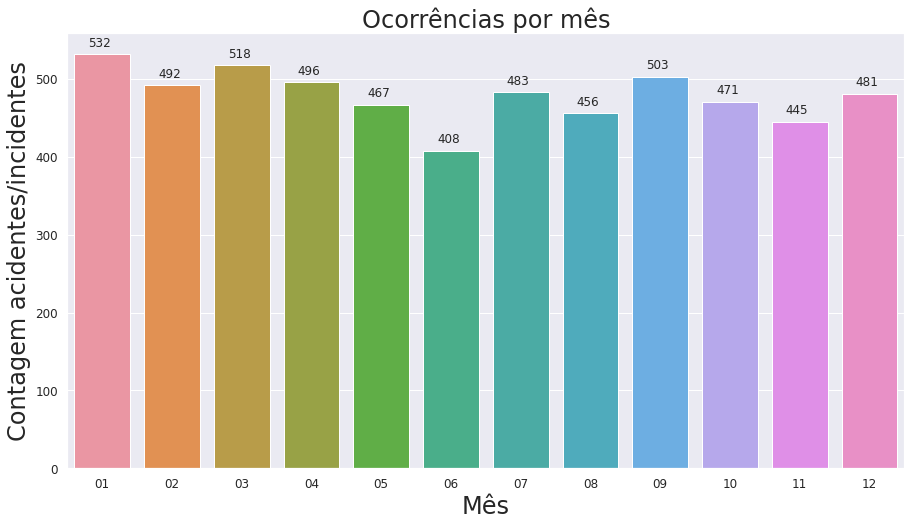

In [47]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df.Mes ,data=df)
plt.xlabel("Mês")
plt.ylabel("Contagem acidentes/incidentes")
plt.title("Ocorrências por mês")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+10))

In [48]:
df

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,****,03/01/2010,03,01,2010
1,40349,INCIDENTE,BELÉM,PA,SBBE,03/01/2010,03,01,2010
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,03,01,2010
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,****,04/01/2010,04,01,2010
4,40324,INCIDENTE,PELOTAS,RS,SBPK,05/01/2010,05,01,2010
...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,29/12/2020,29,12,2020
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,****,30/12/2020,30,12,2020
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,30/12/2020,30,12,2020
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,****,31/12/2020,31,12,2020


# Panorama de acidentes e incidentes por estados

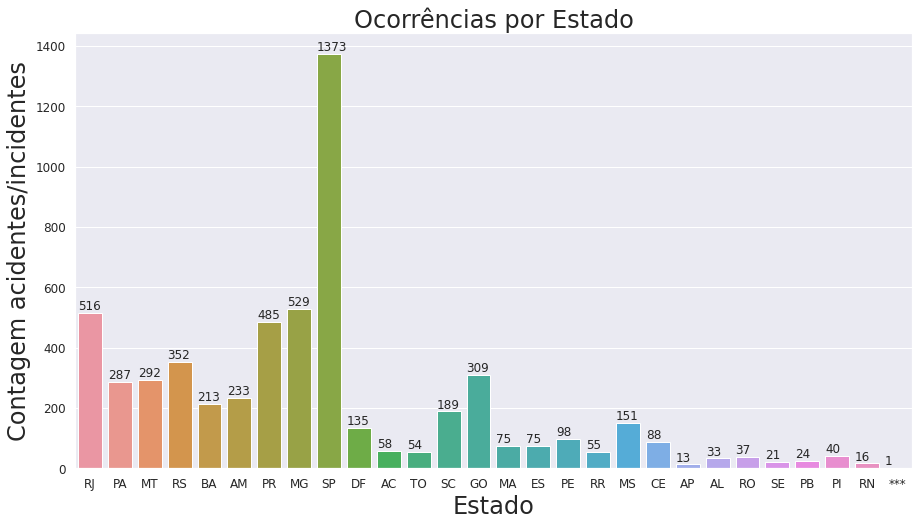

In [49]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df.ocorrencia_uf ,data=df)
plt.xlabel("Estado")
plt.ylabel("Contagem acidentes/incidentes")
plt.title("Ocorrências por Estado")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+10))

In [50]:
df.ocorrencia_uf.value_counts()

SP     1373
MG      529
RJ      516
PR      485
RS      352
GO      309
MT      292
PA      287
AM      233
BA      213
SC      189
MS      151
DF      135
PE       98
CE       88
ES       75
MA       75
AC       58
RR       55
TO       54
PI       40
RO       37
AL       33
PB       24
SE       21
RN       16
AP       13
***       1
Name: ocorrencia_uf, dtype: int64

### Selecionando os 10 estados com maiores quantidades de acidentes e incidentes

In [51]:
top10_ufs = ['SP', 'MG', 'RJ' , 'PR', 'RS', 'GO', 'MT', 'PA', 'AM', 'BA']
df_filter_ufs = df.query('ocorrencia_uf in @top10_ufs')

# Panorama de classificação dos acidentes e incidentes de acordo com cada um dos 10 estados

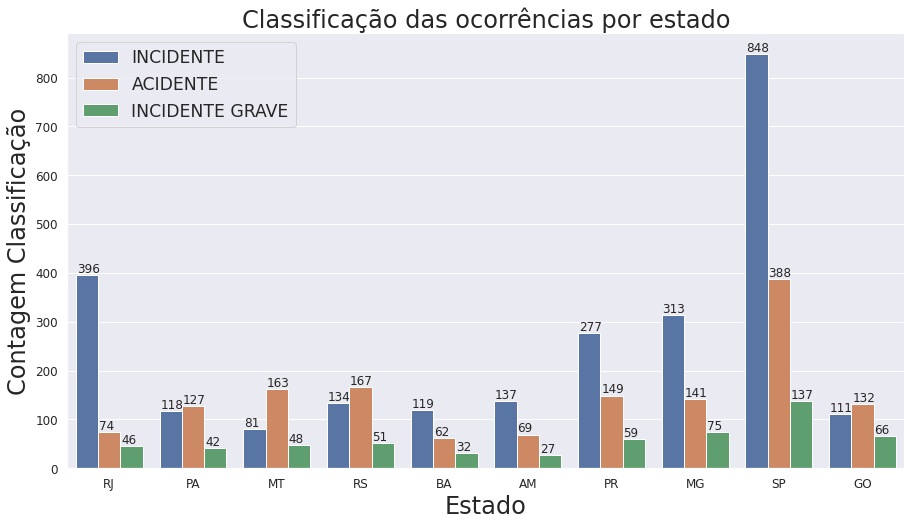

In [52]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df_filter_ufs.ocorrencia_uf ,data=df_filter_ufs, hue=df_filter_ufs.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Estado")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por estado")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))


# Escolhendo o estado com mais ocorrências para ser analisado

In [53]:
df_SP = df_filter_ufs[df_filter_ufs['ocorrencia_uf'].str.contains("SP")]

### Selecionando as 10 cidades do estado de SP que têm mais ocorrências de acidentes e incidentes

In [54]:
df_SP.ocorrencia_cidade.value_counts().head(10)

SÃO PAULO                275
GUARULHOS                153
CAMPINAS                 150
JUNDIAÍ                   76
RIBEIRÃO PRETO            72
BRAGANÇA PAULISTA         55
SÃO JOSÉ DOS CAMPOS       40
SOROCABA                  28
SÃO JOSÉ DO RIO PRETO     24
ATIBAIA                   20
Name: ocorrencia_cidade, dtype: int64

In [55]:
top10_SP_cidades = ['SÃO PAULO', 'GUARULHOS', 'CAMPINAS' , 'JUNDIAÍ', 'RIBEIRÃO PRETO', 'BRAGANÇA PAULIST', 'SÃO JOSÉ DOS CAMPOS', 'SOROCABA', 'SÃO JOSÉ DO RIO PRETO', 'BAURU']
df_filter_SP_cidades = df_SP.query('ocorrencia_cidade in @top10_SP_cidades')

# Panorama de classificação de acidentes e incidentes no estado de SP

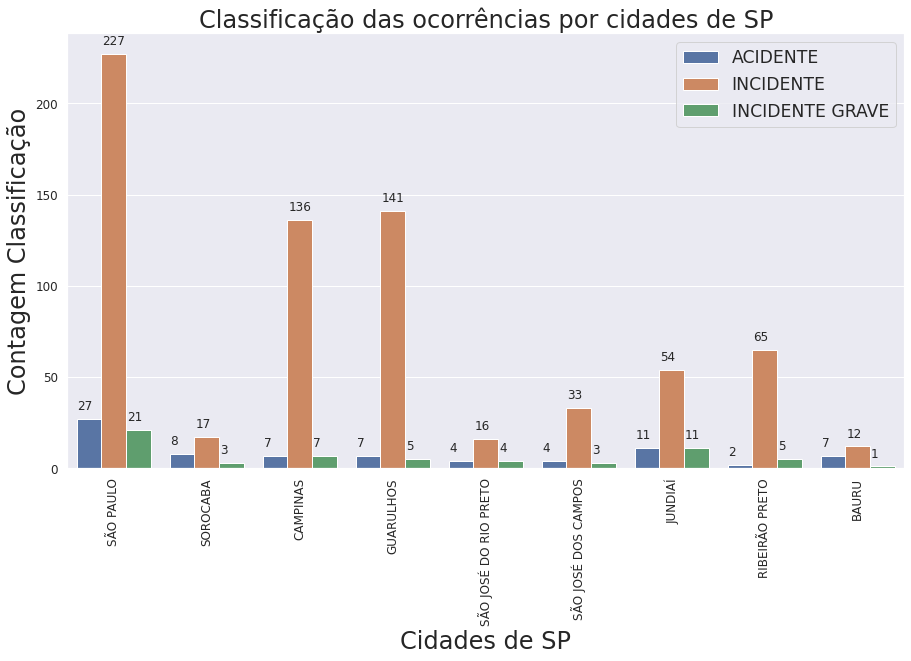

In [56]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=df_filter_SP_cidades.ocorrencia_cidade ,data=df_filter_SP_cidades, hue=df_filter_SP_cidades.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Cidades de SP")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por cidades de SP")
plt.xticks(rotation=90)

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+5))


# Selecionando os aerodromo com mais ocorrências

In [59]:
# Top 12, porque serão retirados os 2 autódromos identificados por * 
aerodromo = df['ocorrencia_aerodromo'].value_counts().head(12)

In [60]:
top_12_aerodromos = df.query('ocorrencia_aerodromo in @aerodromo.index.tolist()')

In [61]:
df_plot = top_12_aerodromos.groupby(['ocorrencia_aerodromo', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='ocorrencia_aerodromo', values=0)

In [62]:
df_plot

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
ocorrencia_aerodromo,,,
****,1191,756,234
*****,14,105,31
SBBH,2,100,4
SBBR,1,75,12
SBGL,1,77,5
SBGO,6,57,10
SBGR,4,131,5
SBJD,8,53,11
SBJR,4,63,9


# Panorama das classificações de acidentes e incidentes por aerodromo

<Figure size 1080x576 with 0 Axes>

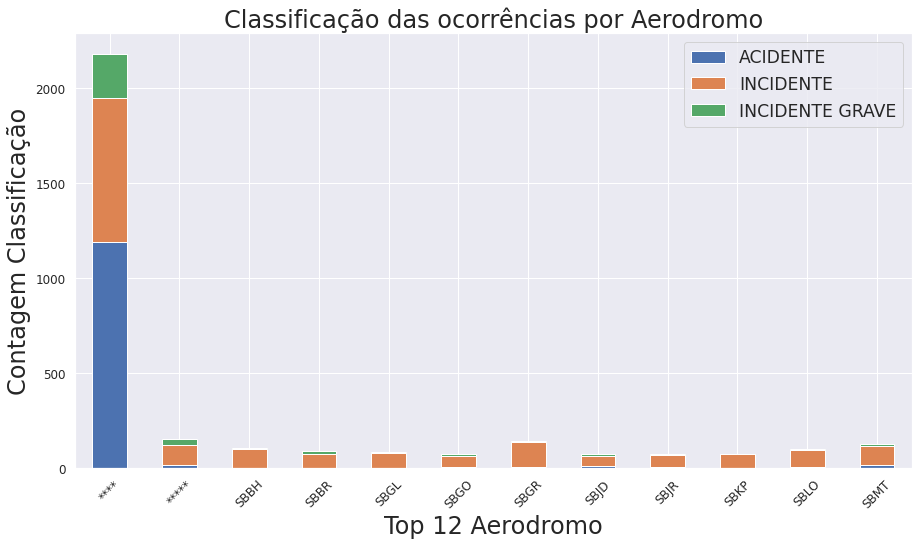

In [63]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = df_plot.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Top 12 Aerodromo")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por Aerodromo")
plt.xticks(rotation=45)

plt.show()

# Removendo os autódromos identificados por *, ficando apenas com os top 10 aerodromo

In [64]:
top_10_aerodromos = aerodromo.index.tolist()[2:]
top_10_aerodromos

['SBGR',
 'SBMT',
 'SBBH',
 'SBLO',
 'SBBR',
 'SBGL',
 'SBJR',
 'SBKP',
 'SBGO',
 'SBJD']

In [67]:
query_10_aerodromos = df.query('ocorrencia_aerodromo in @top_10_aerodromos')

In [68]:
top_10_aerodromos_plot = query_10_aerodromos.groupby(['ocorrencia_aerodromo', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='ocorrencia_aerodromo', values=0)
top_10_aerodromos_plot

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
ocorrencia_aerodromo,,,
SBBH,2,100,4
SBBR,1,75,12
SBGL,1,77,5
SBGO,6,57,10
SBGR,4,131,5
SBJD,8,53,11
SBJR,4,63,9
SBKP,1,74,1
SBLO,7,87,6


# Panorama dos acidentes e incidentes dos top 10 aerodromo

<Figure size 1080x576 with 0 Axes>

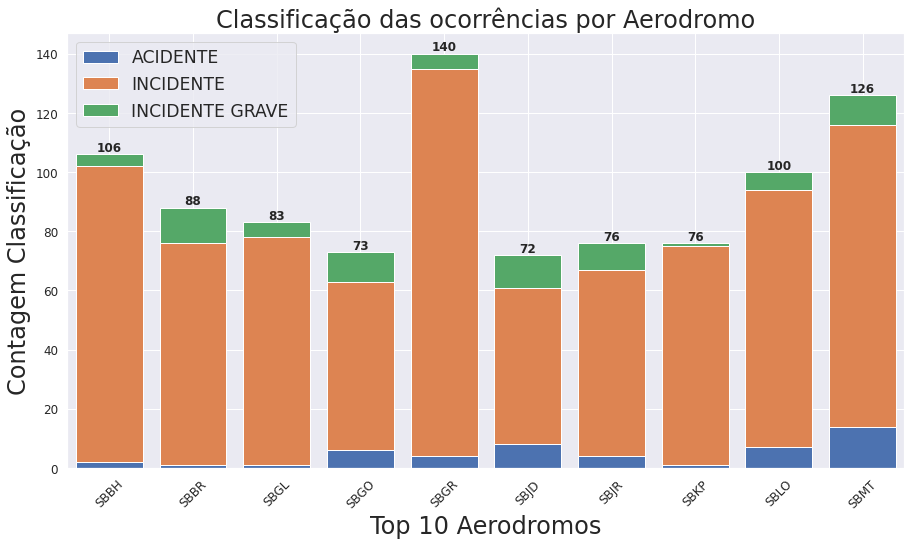

In [69]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = top_10_aerodromos_plot.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Top 10 Aerodromos")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por Aerodromo")
plt.xticks(rotation=45)

bottom = np.zeros(len(top_10_aerodromos_plot))

for i, col in enumerate(top_10_aerodromos_plot.columns):
    ax.bar(top_10_aerodromos_plot.index, top_10_aerodromos_plot[col], bottom=bottom, label=col)
    bottom += np.array(top_10_aerodromos_plot[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = top_10_aerodromos_plot.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

In [70]:
df[df['ocorrencia_aerodromo'] == 'SBGR']

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,Dia,Mes,Ano
33,39848,INCIDENTE,GUARULHOS,SP,SBGR,25/01/2010,25,01,2010
79,39910,INCIDENTE,GUARULHOS,SP,SBGR,08/03/2010,08,03,2010
87,41986,INCIDENTE,GUARULHOS,SP,SBGR,11/03/2010,11,03,2010
91,40320,INCIDENTE,GUARULHOS,SP,SBGR,15/03/2010,15,03,2010
97,41999,INCIDENTE,GUARULHOS,SP,SBGR,18/03/2010,18,03,2010
...,...,...,...,...,...,...,...,...,...
5527,79471,INCIDENTE,GUARULHOS,SP,SBGR,26/07/2020,26,07,2020
5545,79482,INCIDENTE,SÃO PAULO,SP,SBGR,12/08/2020,12,08,2020
5559,79514,INCIDENTE,SÃO PAULO,SP,SBGR,23/08/2020,23,08,2020
5681,79679,INCIDENTE,GUARULHOS,SP,SBGR,17/11/2020,17,11,2020
